# **12. 어텐션이면 충분한 막강한 트랜스포머**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **12.4 임베딩과 위치 인코딩**


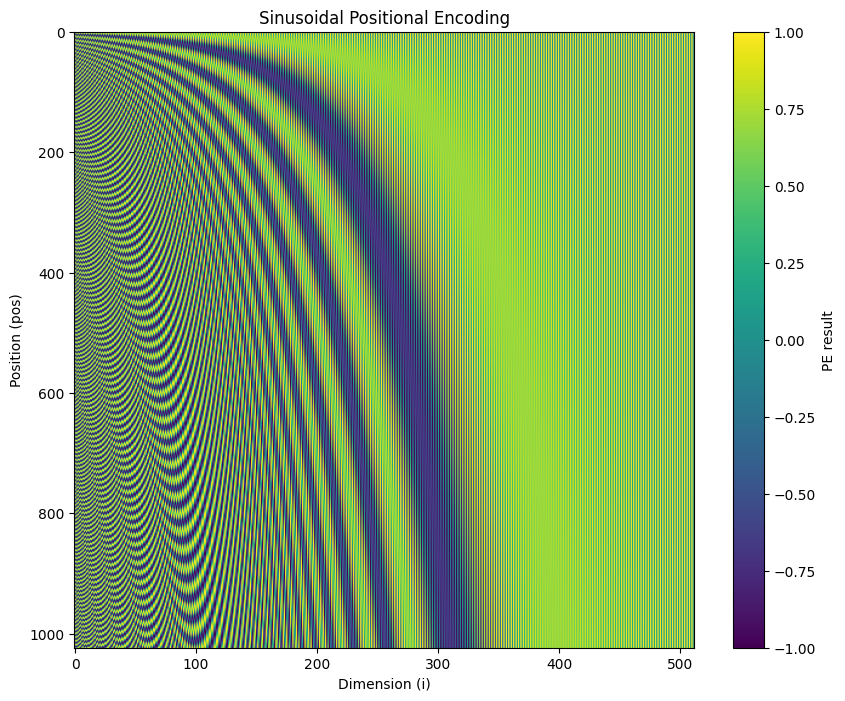

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_token = 1024
d_model = 512

# 1. pos: (n_token, 1) → [0, 1, ..., 1023]
# 2. i:   (d_model,)  → [0, 1, ..., 511]
pos = np.arange(n_token)[:, None]      # shape: (1024, 1)
i   = np.arange(d_model)[None, :]      # shape: (1, 512)

# 3. exponent: (2 * (i // 2)) / d_model
#    → i//2: 0, 0, 1, 1, 2, 2, ...
exponent = (2 * (i // 2)) / d_model    # shape: (1, 512)

# 4. angle_radians = pos / denominator
angle_radians = pos / (10000 ** exponent)      # shape: (1024, 512) — 브로드캐스팅!

# 6. 짝수 차원: sin, 홀수 차원: cos
pe = np.zeros((n_token, d_model))
pe[:, ::2] = np.sin(angle_radians[:, ::2])   # 짝수 인덱스 (0,2,4,...)
pe[:, 1::2] = np.cos(angle_radians[:, 1::2]) # 홀수 인덱스 (1,3,5,...)

# 시각화
plt.figure(figsize=(10, 8))
plt.imshow(pe, cmap='viridis', aspect='auto')
plt.xlabel('Dimension (i)')
plt.ylabel('Position (pos)')
plt.title('Sinusoidal Positional Encoding')
plt.colorbar(label='PE result')
plt.show()